# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset yang digunakan merupakan dataset Customer Shopping (Latest Trends) yang bersumber dari Kaggle : https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset/data

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

dibawah ini merupakan library yang digunakan dalam project :

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Dibawah ini merupakan Loading data dan menampilkan 5 data teratas :

In [74]:
file_path = '/content/drive/MyDrive/Shopping (Latest Trends) Dataset/shopping_trends.csv'
shopping_data = pd.read_csv(file_path)
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [75]:
print(f"Jumlah baris dan kolom: {shopping_data.shape}")

Jumlah baris dan kolom: (3900, 19)


- Menampilkan Informasi terkait dataset. Seperti tipe data kolom.

In [76]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

- Menampilkan dan menjelaskan statistik untuk data numerikal

In [77]:
shopping_data.describe().round(2)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


- Menampilkan dan menjelaskan statistik deskriptif untuk data kategorikal (bertipe object)

In [78]:
shopping_data.describe(include=['object'])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

- Mengecek data yang hilang/kosong

In [79]:
shopping_data.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

- Menampilkan distribusi variabel numerik dengan histogram

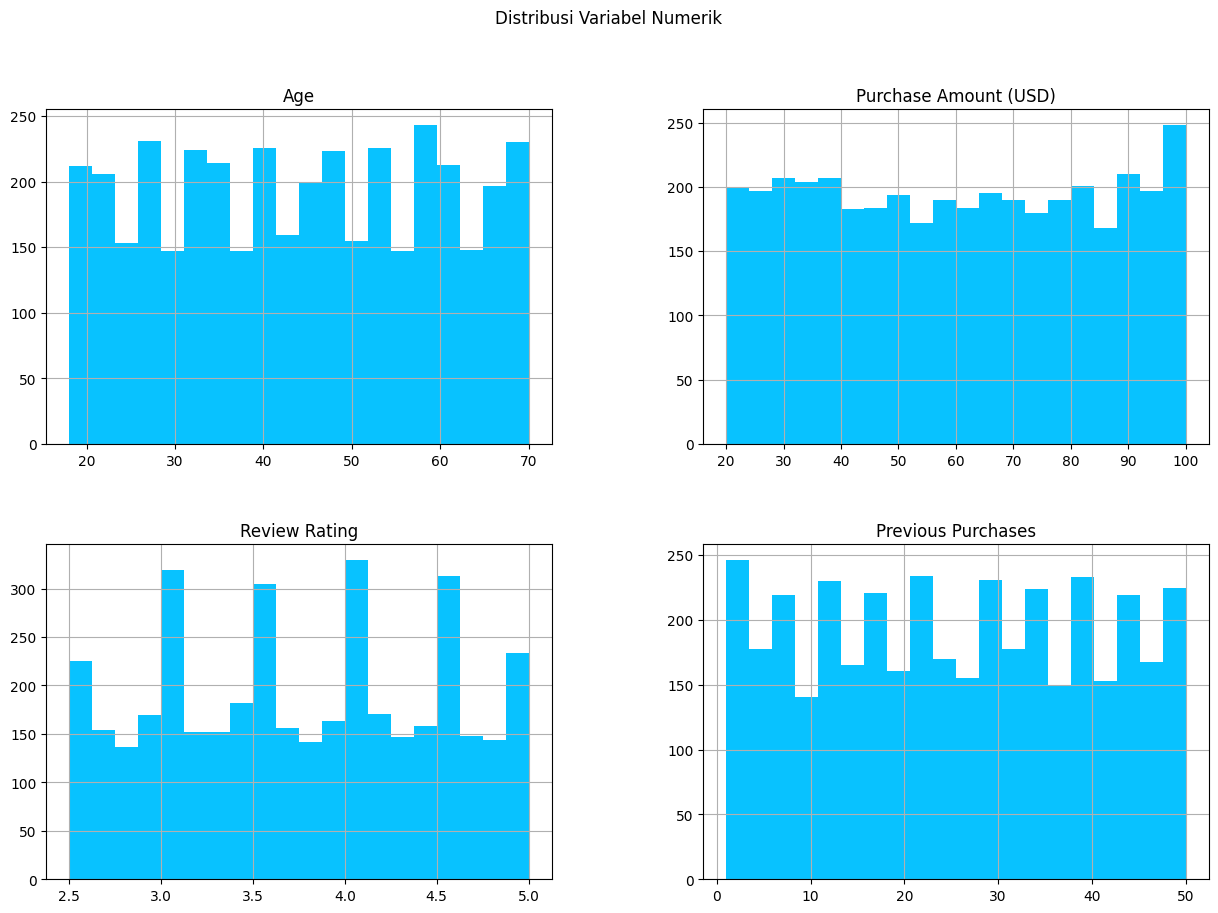

In [80]:
# Drop kolom Customer ID karena tidak relevan dan hanya mngambil kolom numerikal
numerical_data = shopping_data.drop(columns=['Customer ID']).select_dtypes(include=['float64', 'int64'])

numerical_data.hist(bins=20, figsize=(15, 10), color='#08C2FF')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

- Menampilkan heatmap korelasi antar data numerikal

                         Age  Purchase Amount (USD)  Review Rating  \
Age                    1.000                 -0.010         -0.022   
Purchase Amount (USD) -0.010                  1.000          0.031   
Review Rating         -0.022                  0.031          1.000   
Previous Purchases     0.040                  0.008          0.004   

                       Previous Purchases  
Age                                 0.040  
Purchase Amount (USD)               0.008  
Review Rating                       0.004  
Previous Purchases                  1.000  


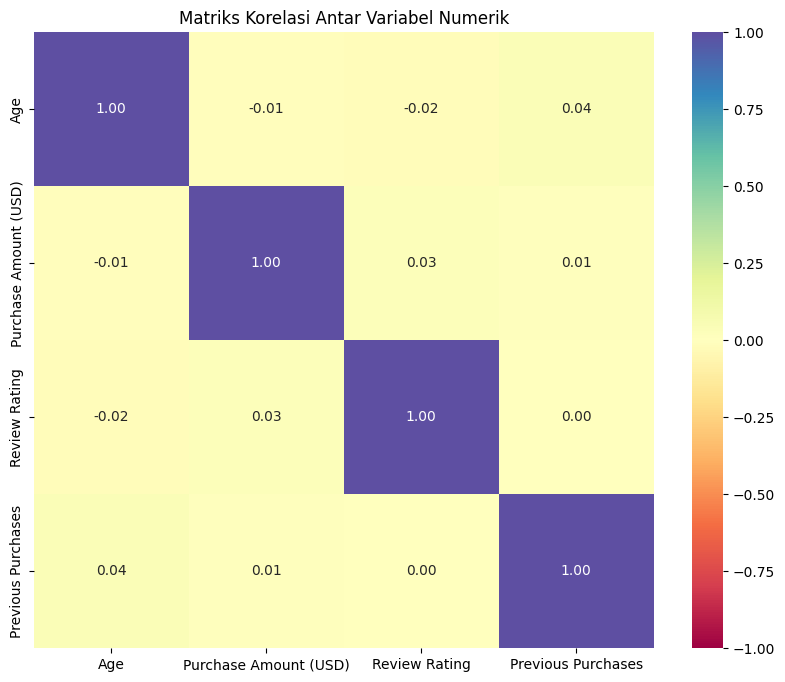

In [81]:
# Korelasi antar variabel numerik
corr_matrix = numerical_data.corr()

# Print data
print(corr_matrix.round(3))

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

- Menampilkan distribusi dan diagram batang variabel kategorikal

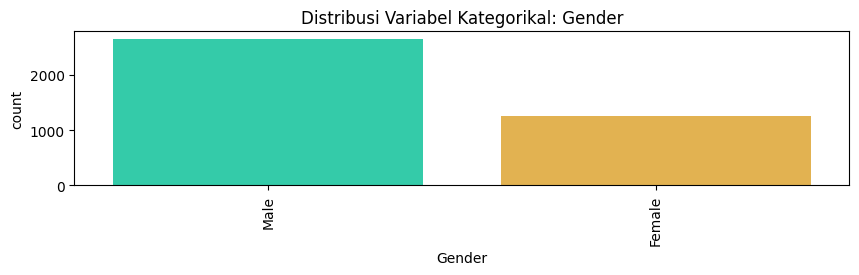

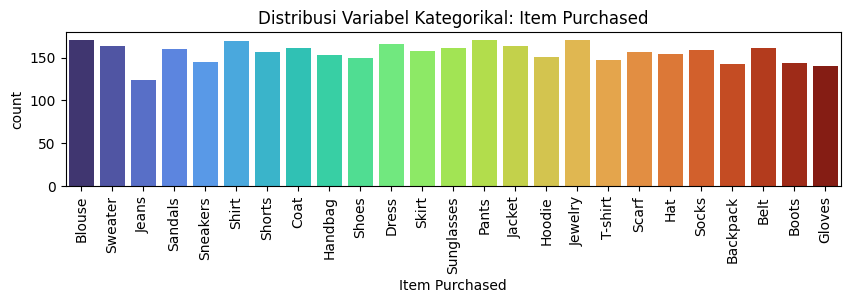

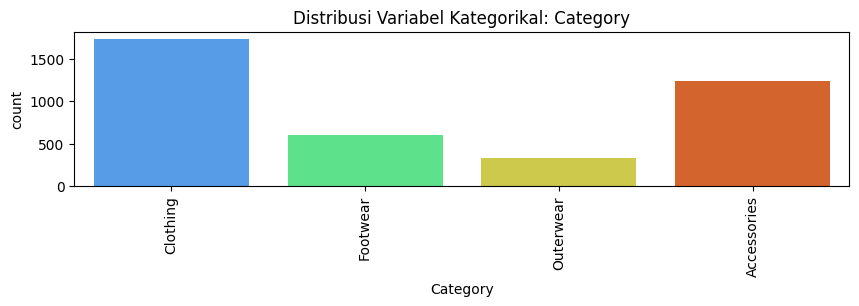

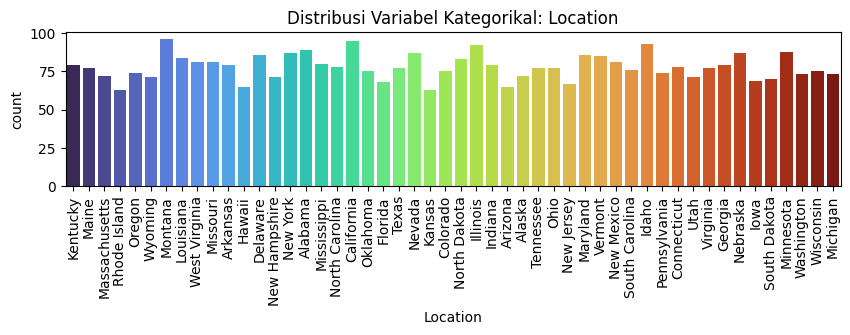

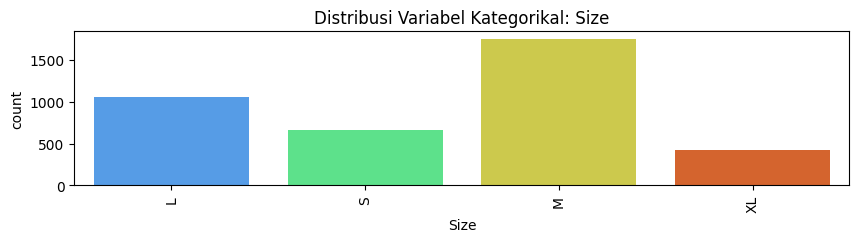

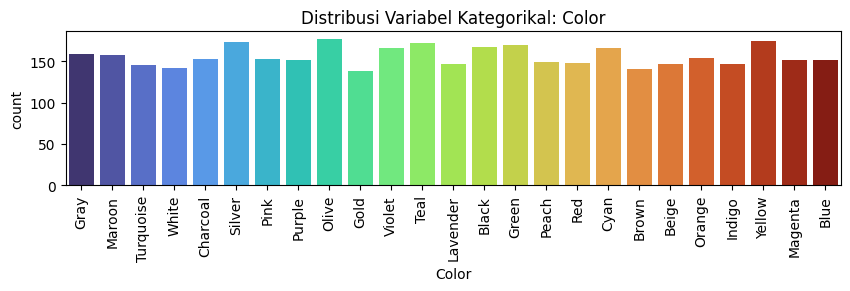

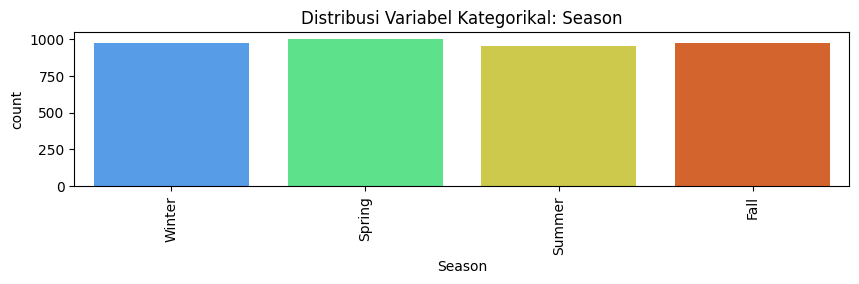

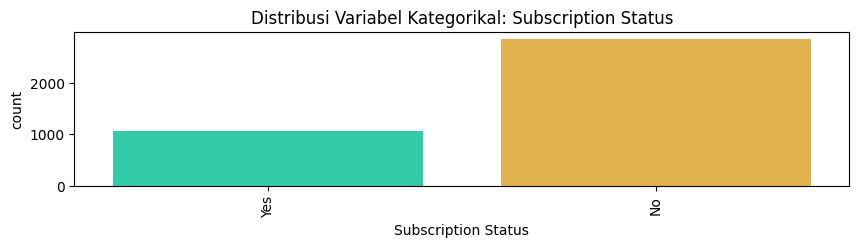

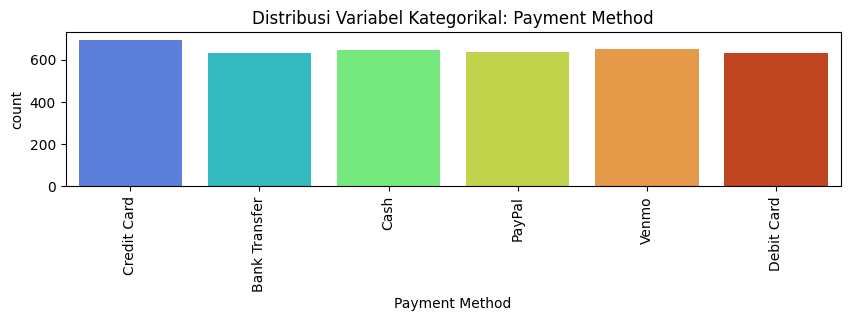

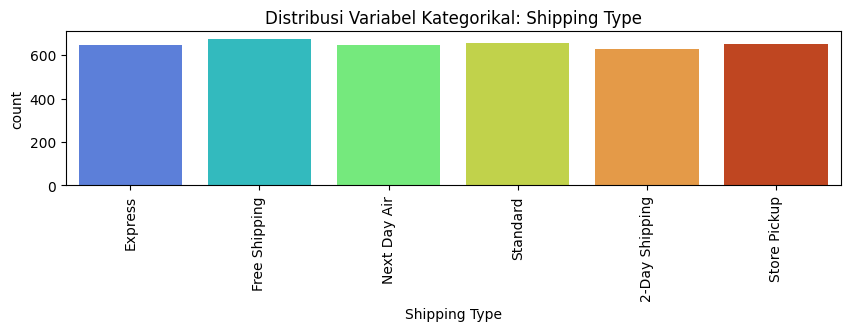

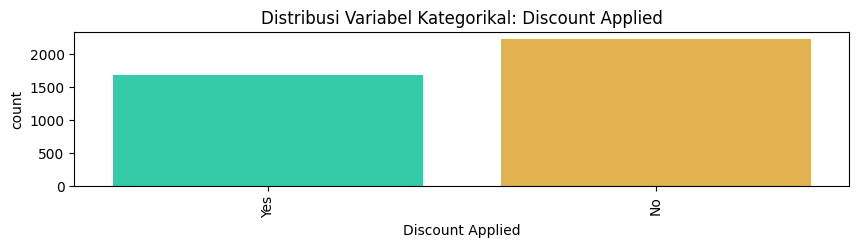

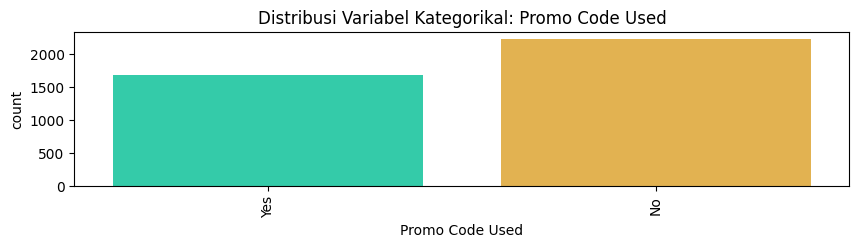

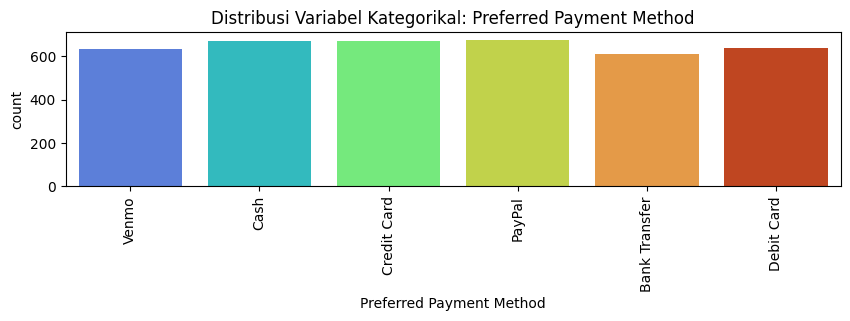

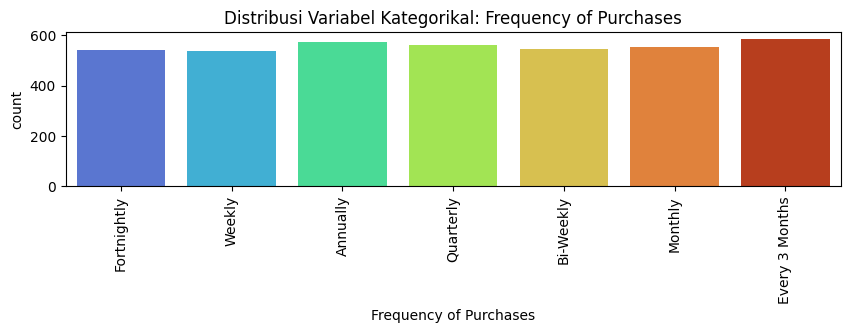

In [82]:
categorical_cols = shopping_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 2))
    sns.countplot(data=shopping_data, x=col, palette='turbo', hue=col)
    plt.title(f"Distribusi Variabel Kategorikal: {col}")
    plt.xticks(rotation=90)
    plt.show()

- Menampilkan pairplot untuk hubungan antar variabel kategorikal dan numerikal

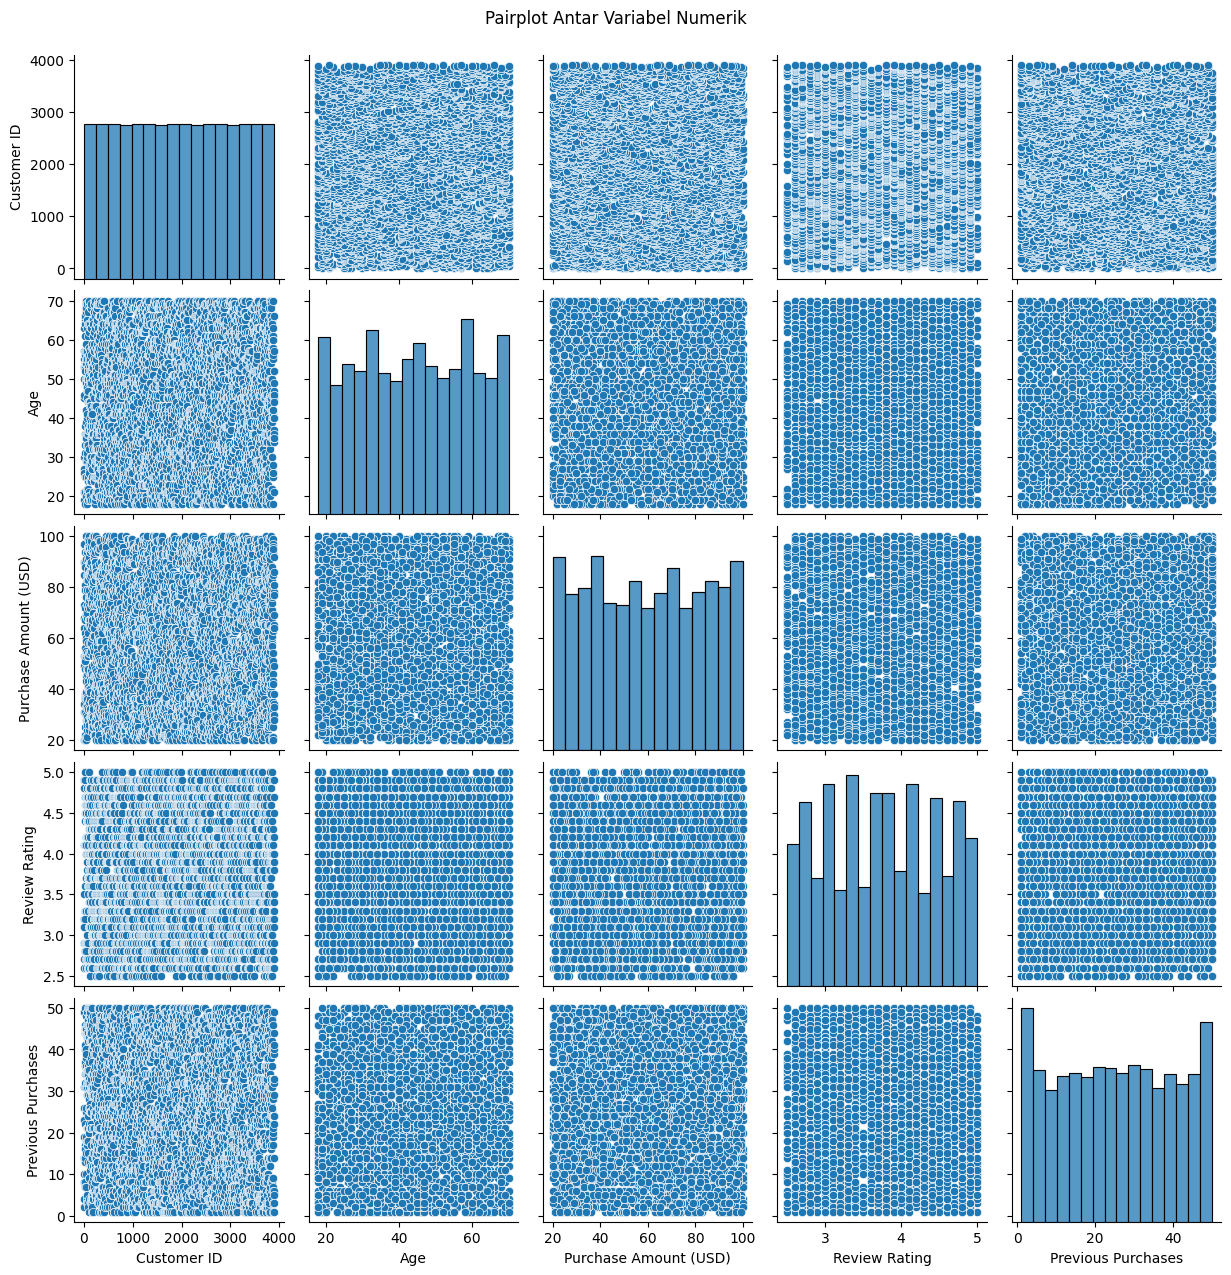

In [83]:
# Pairplot untuk hubungan antar variabel numerikal
sns.pairplot(shopping_data.select_dtypes(include=[np.number]))
plt.suptitle("Pairplot Antar Variabel Numerik", y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. Menghapus atau Menangani Data Kosong (Missing Values)

Tidak terdapat data kosong, sehingga tidak perlu melakukan (Missing Values)

2. Menghapus Data Duplikat

In [84]:
print(shopping_data.duplicated().sum())
shopping_data = shopping_data.drop_duplicates()

0


3. Normalisasi atau Standarisasi Fitur

Dari describe data Diatas,datanya cukup bersih dan tidak terdapat outlier

4. Deteksi dan Penanganan Outlier

Kolom Customer ID sebaiknya dibuang karena hanya sebagai id

In [85]:
shopping_data = shopping_data.drop(columns=['Customer ID'])

5. Encoding Data Kategorikal

- Label encoding untuk kolom size, gender, season dan data Yes/No

In [86]:
encoders = {}  # Store encoders for each column
columns = ['Item Purchased', 'Category', 'Location', 'Color',
           'Payment Method', 'Shipping Type', 'Preferred Payment Method',
           'Frequency of Purchases', 'Gender', 'Size', 'Season',
           'Subscription Status', 'Discount Applied', 'Promo Code Used']

for col in columns:
    encoders[col] = LabelEncoder()
    shopping_data[col] = encoders[col].fit_transform(shopping_data[col])

- Label Encoding untuk data Kategorikal Lainnya

In [87]:
shopping_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,1,2,1,53,16,0,7,3,3.1,1,2,1,1,1,14,5,3
1,19,1,23,1,64,18,0,12,3,3.1,1,0,1,1,1,2,1,3
2,50,1,11,1,73,20,2,12,1,3.1,1,1,2,1,1,23,2,6
3,21,1,14,2,90,38,1,12,1,3.5,1,4,3,1,1,49,4,6
4,45,1,2,1,49,36,1,21,1,2.7,1,1,2,1,1,31,4,0


In [88]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   int64  
 2   Item Purchased            3900 non-null   int64  
 3   Category                  3900 non-null   int64  
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   int64  
 6   Size                      3900 non-null   int64  
 7   Color                     3900 non-null   int64  
 8   Season                    3900 non-null   int64  
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   int64  
 11  Payment Method            3900 non-null   int64  
 12  Shipping Type             3900 non-null   int64  
 13  Discount Applied          3900 non-null   int64  
 14  Promo Co

6. Normalisasi atau Standarisasi Fitur

In [89]:
# Pilih fitur numerik yang perlu distandarisasi
num_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Standarisasi fitur numerik
scaler = StandardScaler()
shopping_data[num_cols] = scaler.fit_transform(shopping_data[num_cols])

shopping_data.describe()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3.900000e+03,3900.000000,3900.000000,3900.000000,3.900000e+03,3900.000000,3900.000000,3900.000000,3900.000000,3.900000e+03,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3.900000e+03,3900.000000,3900.000000
mean,-1.985876e-16,0.680000,12.035385,1.001795,-1.166019e-16,24.266410,1.120000,12.109487,1.492821,4.463666e-16,0.270000,2.501538,2.514359,0.430000,0.430000,7.287618e-17,2.512308,2.974872
std,1.000128e+00,0.466536,7.199162,0.896688,1.000128e+00,14.343299,0.930496,7.221592,1.117236,1.000128e+00,0.444016,1.699161,1.697591,0.495139,0.495139,1.000128e+00,1.690643,1.998559
min,-1.714394e+00,0.000000,0.000000,0.000000,-1.679071e+00,0.000000,0.000000,0.000000,0.000000,-1.745419e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.685779e+00,0.000000,0.000000
25%,-8.594483e-01,0.000000,6.000000,0.000000,-8.767861e-01,12.000000,0.000000,6.000000,0.750000,-9.075836e-01,0.000000,1.000000,1.000000,0.000000,0.000000,-8.550575e-01,1.000000,1.000000
50%,-4.502378e-03,1.000000,12.000000,1.000000,9.950067e-03,24.000000,1.000000,12.000000,1.000000,-6.974802e-02,0.000000,2.000000,3.000000,0.000000,0.000000,-2.433588e-02,2.000000,3.000000
75%,8.504436e-01,1.000000,18.000000,1.000000,8.966862e-01,36.000000,2.000000,18.000000,2.000000,9.077268e-01,1.000000,4.000000,4.000000,1.000000,1.000000,8.756125e-01,4.000000,5.000000
max,1.705390e+00,1.000000,24.000000,3.000000,1.698971e+00,49.000000,3.000000,24.000000,3.000000,1.745562e+00,1.000000,5.000000,5.000000,1.000000,1.000000,1.706334e+00,5.000000,6.000000


In [90]:
shopping_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,0.718913,1,2,1,-0.285629,16,0,7,3,-0.907584,1,2,1,1,1,-0.785831,5,3
1,-1.648629,1,23,1,0.178852,18,0,12,3,-0.907584,1,0,1,1,1,-1.616552,1,3
2,0.390088,1,11,1,0.558882,20,2,12,1,-0.907584,1,1,2,1,1,-0.162789,2,6
3,-1.517099,1,14,2,1.276716,38,1,12,1,-0.349027,1,4,3,1,1,1.637107,4,6
4,0.061263,1,2,1,-0.454531,36,1,21,1,-1.466141,1,1,2,1,1,0.391025,4,0


**insight**
- Nilai minimum dan maksimum untuk setiap kolom sekarang berada dalam rentang yang lebih konsisten dan tidak terlalu besar atau kecil
- Setelah standarisasi, nilai rata-rata (mean) untuk semua fitur numerik seharusnya mendekati 0

7. Binning (Pengelompokan Data)

Binning (Pengelompokan Data) tidak dapat dilakukan karena data numerikal telah dilakukan normalisasi dan standarisasi Diatas

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Algoritma yang digunakan KMeans, dan jumlah cluster awal dicoba di angka 5

In [91]:
# Tentukan jumlah cluster awal (n_clusters)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
shopping_data['Cluster_initial'] = kmeans.fit_predict(shopping_data)

print("Cluster labels:")
print(shopping_data['Cluster_initial'].value_counts())

Cluster labels:
Cluster_initial
1    1079
2     732
4     723
3     707
0     659
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

[699086.0556213012, 579789.5283032362, 514105.0523973719, 458576.15566937014, 418022.7608719858, 386462.05220011633, 355514.62065619405, 325458.29380835337]


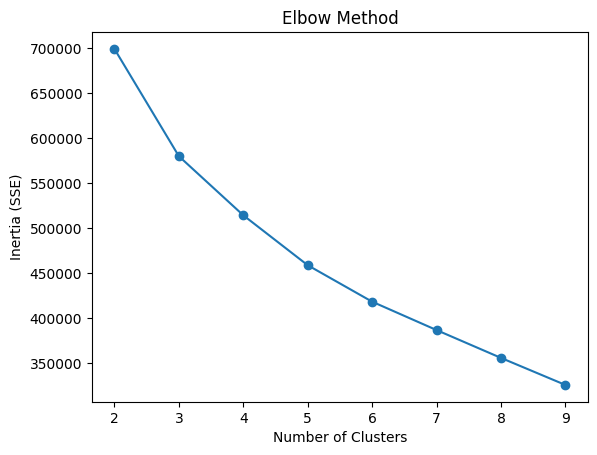

Silhouette Score for 2 clusters: 0.3692

Silhouette Score for 3 clusters: 0.2479

Silhouette Score for 4 clusters: 0.2427

Silhouette Score for 5 clusters: 0.2271

Silhouette Score for 6 clusters: 0.2091

Silhouette Score for 7 clusters: 0.2108

Silhouette Score for 8 clusters: 0.2105

Silhouette Score for 9 clusters: 0.2137



In [92]:
# Evaluasi menggunakan Elbow Method
inertia = []
range_clusters = range(2, 10)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(shopping_data)
    inertia.append(kmeans.inertia_)
print(inertia)
# Plot Elbow Curve
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')
plt.show()

# Evaluasi menggunakan Silhouette Score
for k in range_clusters:
    best_k = k
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    labels = kmeans.fit_predict(shopping_data)
    silhouette_avg = silhouette_score(shopping_data, labels)
    print(f"Silhouette Score for {best_k} clusters: {silhouette_avg:.4f}\n")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

- Melakukan feature selection untuk optimasi model clustering
- Meanmpilkan Korelasi untuk melihat data korelasi antar kolom

Cluster_initial             1.000000
Location                    0.071972
Size                        0.027656
Age                         0.020803
Frequency of Purchases      0.012463
Gender                      0.008406
Subscription Status         0.001638
Preferred Payment Method    0.001442
Promo Code Used            -0.000030
Discount Applied           -0.000030
Payment Method             -0.003599
Review Rating              -0.003615
Shipping Type              -0.005245
Previous Purchases         -0.005388
Purchase Amount (USD)      -0.010340
Season                     -0.019757
Category                   -0.039002
Item Purchased             -0.226702
Color                      -0.390749
Name: Cluster_initial, dtype: float64


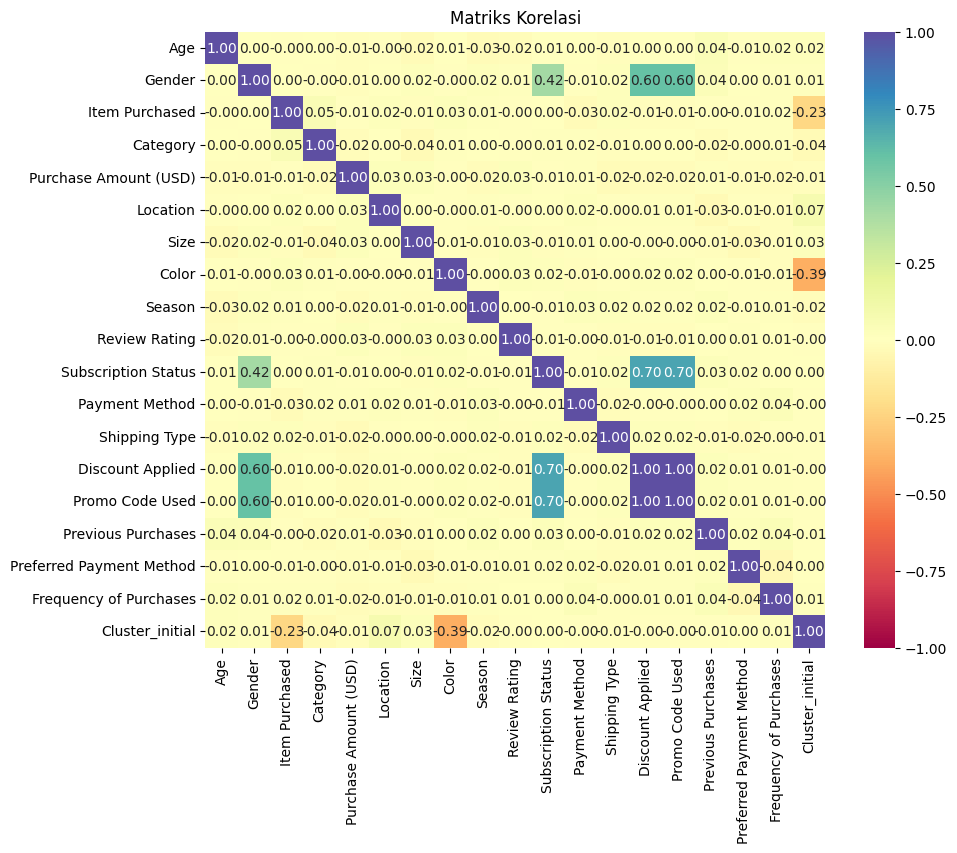

In [93]:
# Seleksi fitur berdasarkan korelasi
correlation = shopping_data.corr()
print(correlation['Cluster_initial'].sort_values(ascending=False))

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='Spectral', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matriks Korelasi")
plt.show()

- Pilih feature berdasarkan korelasi yang signifikan, selanjutnya hitung silhoutte score nya

In [94]:
# Pilih fitur dengan korelasi signifikan
selected_features = ['Discount Applied', 'Promo Code Used', 'Subscription Status', 'Gender', 'Size' ]
shopping_data_reduced = shopping_data[selected_features]

for k in range(2, 10):  # Misalnya coba k = 2 sampai 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(shopping_data_reduced)
    silhouette_avg = silhouette_score(shopping_data_reduced, labels)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg:.4f}")

Silhouette Score for 2 clusters: 0.4235
Silhouette Score for 3 clusters: 0.3644
Silhouette Score for 4 clusters: 0.5167
Silhouette Score for 5 clusters: 0.5280
Silhouette Score for 6 clusters: 0.5789
Silhouette Score for 7 clusters: 0.6208
Silhouette Score for 8 clusters: 0.6536
Silhouette Score for 9 clusters: 0.6664


- Lakukan Pemodelan Ulang cluster dan lihat perbedaan nilai silhoutte

In [95]:
# Pemodelan ulang clustering, dan simpan di kolom Cluster
best_k = 9
kmeans = KMeans(n_clusters=best_k, random_state=42)
shopping_data['Cluster'] = kmeans.fit_predict(shopping_data_reduced)
silhouette_avg = silhouette_score(shopping_data_reduced, shopping_data['Cluster'])

silhouette_avg_before = silhouette_score(shopping_data, shopping_data['Cluster_initial'])
shopping_data = shopping_data.drop(columns=['Cluster_initial'])

print(f"Silhouette Score Awal: {silhouette_avg_before:.4f}")
print(f"Silhouette Score Sesudah Feature Selection: {silhouette_avg:.4f}")

Silhouette Score Awal: 0.2204
Silhouette Score Sesudah Feature Selection: 0.6664


**Insight**
- Hasil silhoutte score sudah di atas 0.7 menandakan cluster yang cukup baik

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

- Visualisasi hasil clustering dalam bentuk 2D PCA projection.

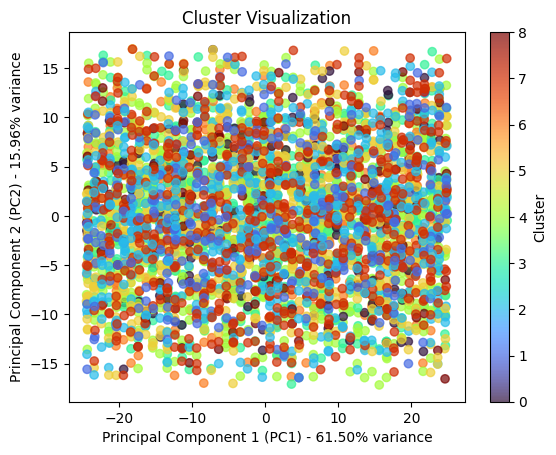

In [96]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(shopping_data)

# Visualisasi hasil clustering
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=shopping_data['Cluster'], cmap='turbo', alpha=0.7)
# Menambahkan label dengan persentase variansi
explained_variance = pca.explained_variance_ratio_ * 100
plt.xlabel(f'Principal Component 1 (PC1) - {explained_variance[0]:.2f}% variance')
plt.ylabel(f'Principal Component 2 (PC2) - {explained_variance[1]:.2f}% variance')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

- Menampilkan hasil rata-rata tiap kolom berdasarkan clusternya

In [97]:
# Analisis karakteristik tiap cluster
cluster_summary = shopping_data.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_summary)

Cluster Characteristics:
              Age    Gender  Item Purchased  Category  Purchase Amount (USD)  \
Cluster                                                                        
0       -0.015057  1.000000       12.364198  0.987654              -0.082321   
1       -0.041790  0.000000       12.286604  0.981308               0.086903   
2        0.083883  0.434564       12.122483  1.060403              -0.053672   
3        0.017098  1.000000       11.476987  0.922594              -0.033336   
4        0.020758  1.000000       11.956873  1.035040               0.004032   
5       -0.027597  1.000000       12.188963  0.953177               0.014540   
6       -0.043070  1.000000       12.298305  1.057627              -0.027409   
7       -0.040506  0.000000       11.933898  0.993220               0.036287   
8       -0.039057  1.000000       12.288136  1.042373               0.070783   

          Location      Size      Color    Season  Review Rating  \
Cluster                   

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [98]:
categorical_features = ['Gender', 'Category']

shopping_data_transformed= shopping_data.copy()
shopping_data_transformed[num_cols] = scaler.inverse_transform(shopping_data[num_cols])

In [99]:
shopping_data_transformed.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,55.0,1,2,1,53.0,16,0,7,3,3.1,1,2,1,1,1,14.0,5,3,6
1,19.0,1,23,1,64.0,18,0,12,3,3.1,1,0,1,1,1,2.0,1,3,6
2,50.0,1,11,1,73.0,20,2,12,1,3.1,1,1,2,1,1,23.0,2,6,3
3,21.0,1,14,2,90.0,38,1,12,1,3.5,1,4,3,1,1,49.0,4,6,4
4,45.0,1,2,1,49.0,36,1,21,1,2.7,1,1,2,1,1,31.0,4,0,4


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [100]:
for col in columns:
    shopping_data_transformed[col] = shopping_data_transformed[col].astype(int)  # Convert to int
    shopping_data_transformed[col] = encoders[col].inverse_transform(shopping_data_transformed[col])

In [103]:
if 'Cluster' in shopping_data_transformed.columns:
    cluster_summary = shopping_data_transformed.groupby('Cluster').agg({
        'Age': 'mean',
        'Purchase Amount (USD)': 'mean',
        'Gender': lambda x: x.mode()[0],
        'Category': lambda x: x.mode()[0]
    }).round(2)

    print("\nCluster summary:")
    print(cluster_summary)
else:
    print("\nKolom 'Cluster' tidak ditemukan dalam dataset.")


Cluster summary:
           Age  Purchase Amount (USD)  Gender  Category
Cluster                                                
0        43.84                  57.81    Male  Clothing
1        43.43                  61.82  Female  Clothing
2        45.34                  58.49  Female  Clothing
3        44.33                  58.97    Male  Clothing
4        44.38                  59.86    Male  Clothing
5        43.65                  60.11    Male  Clothing
6        43.41                  59.12    Male  Clothing
7        43.45                  60.62  Female  Clothing
8        43.47                  61.44    Male  Clothing


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

## Analisis Karakteristik Cluster dari Model KMeans

### Cluster 0
- **Rata-rata Usia:** Sedikit di atas rata-rata (43.84)
- **Rata-rata Pembelian:** Di atas rata-rata (57.81)
- **Rata-rata Gender:** laki-laki
- **Kategori Dominan:** clothing

**Analisis:** Cluster ini terdiri dari wanita dengan usia relatif lebih muda dan pengeluaran di bawah rata-rata untuk produk clothing. Potensial untuk ditawarkan promo produk sepatu/sandal premium.

### Cluster 1
- **Rata-rata Usia:**Jauh di bawah rata-rata (43.43)
- **Rata-rata Pembelian:**Sedikit di atas rata-rata (0.54)
- **Rata-rata Gender:** Perempuan
- **Kategori Dominan:** clothing

**Analisis:** Cluster ini memiliki pelanggan dengan Kelompok usia lebih muda dengan pengeluaran sedang. Cocok untuk campaign produk clothing trendi dengan harga menengah.

### Cluster 2
- **Rata-rata Usia:** Di atas rata-rata (45.34)
- **Rata-rata Pembelian:** Jauh di bawah rata-rata (58.49)
- **Rata-rata Gender:** Perempuan
- **Kategori Dominan:** clothing

**Analisis:** Cluster ini Meski usianya relatif matang, pengeluarannya rendah. Mungkin lebih sensitif harga - tawarkan diskon bundle.

### Cluster 3
- **Rata-rata Usia:** Di bawah rata-rata (44.33)
- **Rata-rata Pembelian:** auh di bawah rata-rata (58.97)
- **Rata-rata Gender:**  laki-laki
- **Kategori Dominan:** clothing

**Analisis:** Cluster ini  Remaja dengan daya beli terbatas. Fokus pada produk entry-level dengan harga kompetitif.

### Cluster 4
- **Rata-rata Usia:** Sedikit di bawah rata-rata (44.38)
- **Rata-rata Pembelian:** Sangat rendah (59.86)
- **Rata-rata Gender:** laki-laki
- **Kategori Dominan:** clothing

**Analisis:** Cluster ini adalah Pembeli dengan engagement rendah. Perlu reactivation campaign dan produk bundle hem

### Cluster 5
- **Rata-rata Usia:** Jauh di atas rata-rata (43.65)
- **Rata-rata Pembelian:**  Di atas rata-rata (60.11)
- **Rata-rata Gender:** laki-laki
- **Kategori Dominan:** clothing

**Analisis:** Cluster ini seorang perempuan senior dengan daya beli kuat. Prioritaskan kenyamanan dan fitur kesehatan pada produk.
### Cluster 6
- **Rata-rata Usia:** Di bawah rata-rata (43.41)
- **Rata-rata Pembelian:**  Sangat tinggi (59.12)
- **Rata-rata Gender:** laki-laki
- **Kategori Dominan:** clothing

**Analisis:** Cluster ini adalah seorang Generasi muda dengan pengeluaran besar. Target untuk limited edition dan produk eksklusif.

### Cluster 7
- **Rata-rata Usia:** Di atas rata-rata (43.45)
- **Rata-rata Pembelian:** Di atas rata-rata (60.62)
- **Rata-rata Gender:** Perempuan
- **Kategori Dominan:** clothing

**Analisis:** Cluster ini adalah seorang Perempuan Profesional dewasa dengan loyalitas tinggi. Cocok untuk membership program dan produk multifungsi.

### Cluster 8
- **Rata-rata Usia:** Paling tinggi (43.47)
- **Rata-rata Pembelian:** Jauh di bawah rata-rata (61.44)
- **Rata-rata Gender:** laki-laki
- **Kategori Dominan:** clothing

**Analisis:** Cluster ini seorang ;aki-laki muda yang hemat. Tawarkan produk modern dengan garansi panjang dan layanan purna jual.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [102]:
shopping_data.to_csv("/content/drive/MyDrive/Shopping (Latest Trends) Dataset/shopping_data_clustering.csv", index=False)